In [ ]:

library(readr)

# URL for the seoul_bike_sharing dataset
seoul_bike_sharing_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"


seoul_bike_sharing <- read_csv(seoul_bike_sharing_url, col_types = cols(DATE = col_character()))


head(seoul_bike_sharing)


DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


In [ ]:

library(dplyr)
library(lubridate)




seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(DATE = dmy(DATE))


str(seoul_bike_sharing)


tibble [8,465 × 14] (S3: tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : num [1:8465] 0 1 2 3 4 5 6 7 8 9 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY              : chr [1:8465] "N

In [ ]:

seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(HOUR = factor(HOUR, levels = c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                                        "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
                                        "21", "22", "23"), ordered = TRUE))

# Display the structure of the dataframe to verify
str(seoul_bike_sharing)


tibble [8,465 × 14] (S3: tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDA

In [ ]:
# Check for missing values
sum(is.na(seoul_bike_sharing))


[1] 0

In [ ]:
# Task 4: Dataset Summary
summary(seoul_bike_sharing)


      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

In [ ]:
# Task 5: Calculate number of Holidays
num_holidays <- sum(seoul_bike_sharing$HOLIDAY == "Holiday")
num_holidays


[1] 408

In [ ]:
# Task 6: Calculate percentage of records on Holiday
percentage_holidays <- mean(seoul_bike_sharing$HOLIDAY == "Holiday") * 100
percentage_holidays


[1] 4.819846

In [ ]:
# Task 7: Calculate expected number of records
expected_records <- 365
expected_records


[1] 365

In [ ]:
# Task 8: Calculate number of records with FUNCTIONING_DAY == 'Yes'
num_functioning_days <- sum(seoul_bike_sharing$FUNCTIONING_DAY == "Yes")
num_functioning_days


[1] 8465

In [ ]:
# Task 9: Calculate seasonal total rainfall and snowfall
library(dplyr)

seasonal_summary <- seoul_bike_sharing %>%
  group_by(SEASONS) %>%
  summarize(total_rainfall = sum(RAINFALL, na.rm = TRUE),
            total_snowfall = sum(SNOWFALL, na.rm = TRUE))

seasonal_summary


SEASONS,total_rainfall,total_snowfall
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


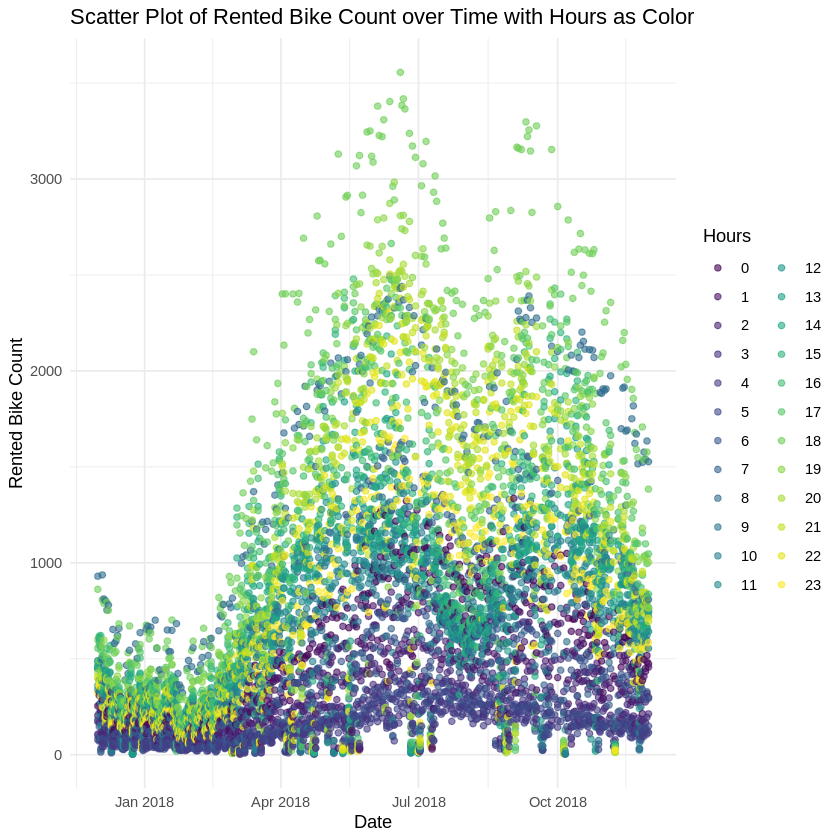

In [ ]:
# Load ggplot2 package
library(ggplot2)

# Create scatter plot with HOURS as color
ggplot(seoul_bike_sharing, aes(x = as.Date(DATE, format = "%d/%m/%Y"), y = RENTED_BIKE_COUNT, color = factor(HOUR))) +
  geom_point(alpha = 0.6) +  # Adjust opacity of points
  labs(x = "Date", y = "Rented Bike Count", color = "Hours") +  # Label axes and legend
  ggtitle("Scatter Plot of Rented Bike Count over Time with Hours as Color") +  # Add title
  theme_minimal()  # Apply minimal theme


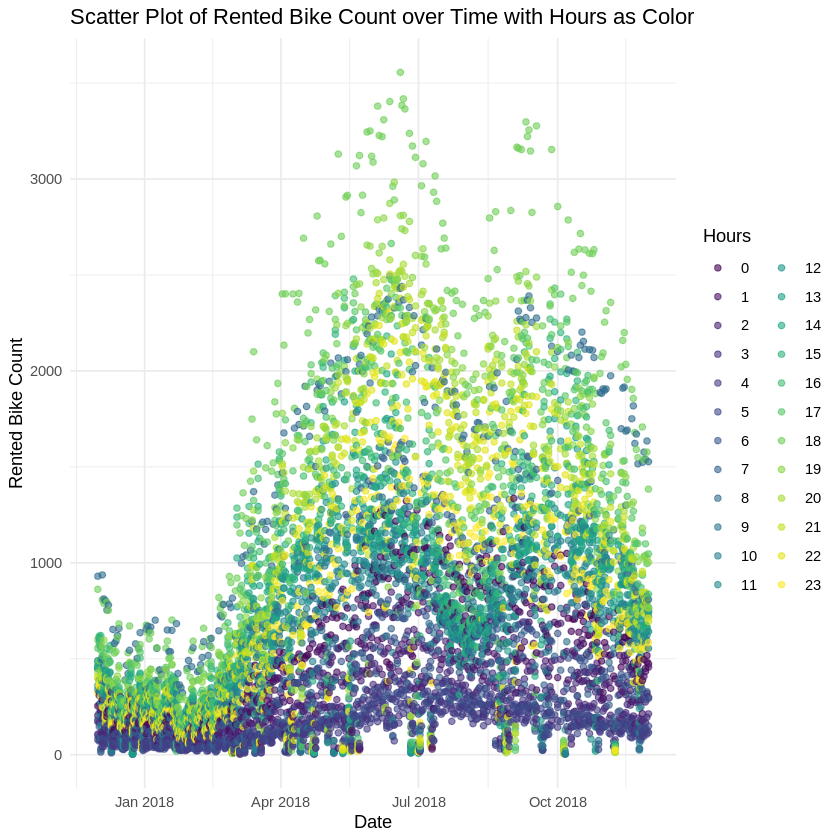

In [ ]:
# Create scatter plot with HOURS as color
ggplot(seoul_bike_sharing, aes(x = as.Date(DATE, format = "%d/%m/%Y"), y = RENTED_BIKE_COUNT, color = factor(HOUR))) +
  geom_point(alpha = 0.6) +  # Adjust opacity of points
  labs(x = "Date", y = "Rented Bike Count", color = "Hours") +  # Label axes and legend
  ggtitle("Scatter Plot of Rented Bike Count over Time with Hours as Color") +  # Add title
  theme_minimal()  # Apply minimal theme


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


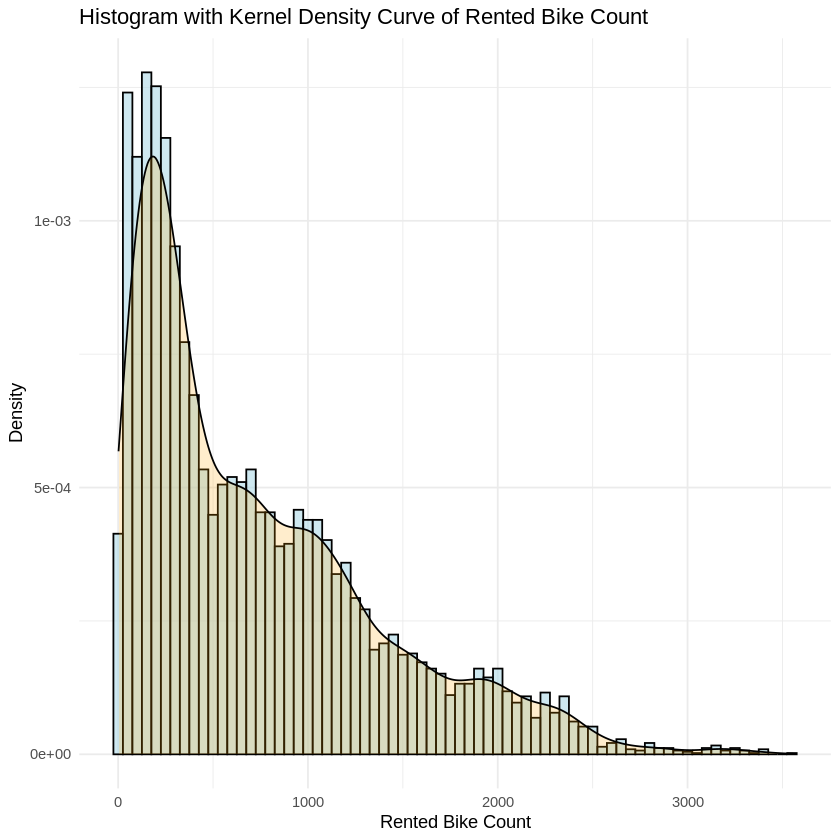

In [ ]:
# Create histogram with kernel density curve
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT, y = ..density..)) +
  geom_histogram(binwidth = 50, fill = "lightblue", color = "black", aes(y = ..density..), alpha = 0.6) +
  geom_density(alpha = 0.2, fill = "orange") +
  labs(x = "Rented Bike Count", y = "Density", title = "Histogram with Kernel Density Curve of Rented Bike Count") +
  theme_minimal()


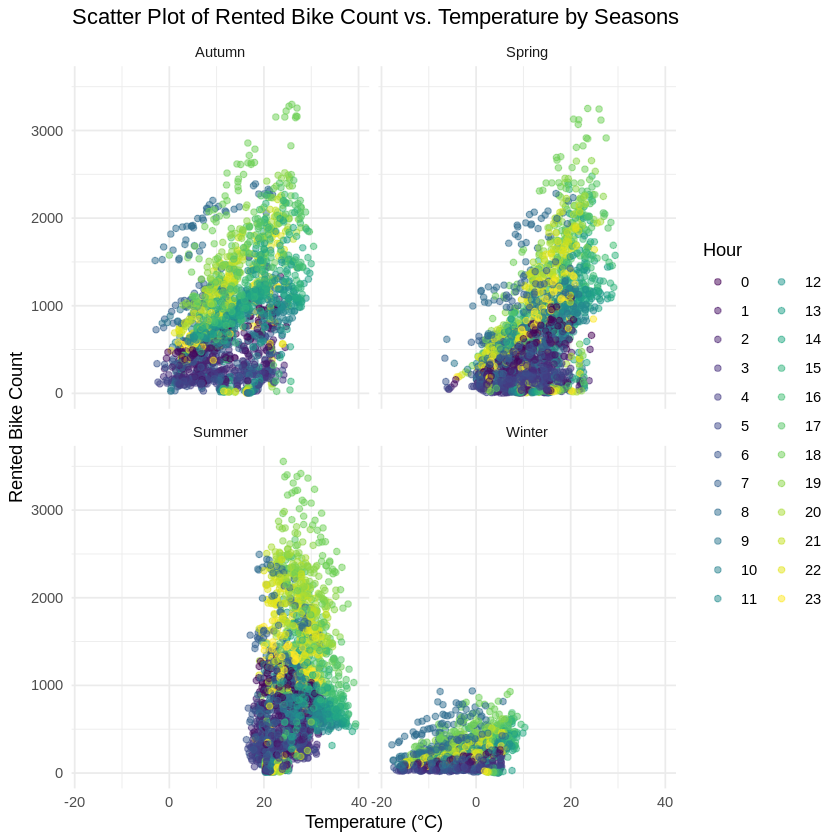

In [ ]:
# Load the necessary library
library(ggplot2)

# Create scatter plot with faceting by SEASONS
ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = factor(HOUR))) +
  geom_point(alpha = 0.5) +
  facet_wrap(~ SEASONS) +
  labs(
    title = "Scatter Plot of Rented Bike Count vs. Temperature by Seasons",
    x = "Temperature (°C)",
    y = "Rented Bike Count",
    color = "Hour"
  ) +
  theme_minimal()


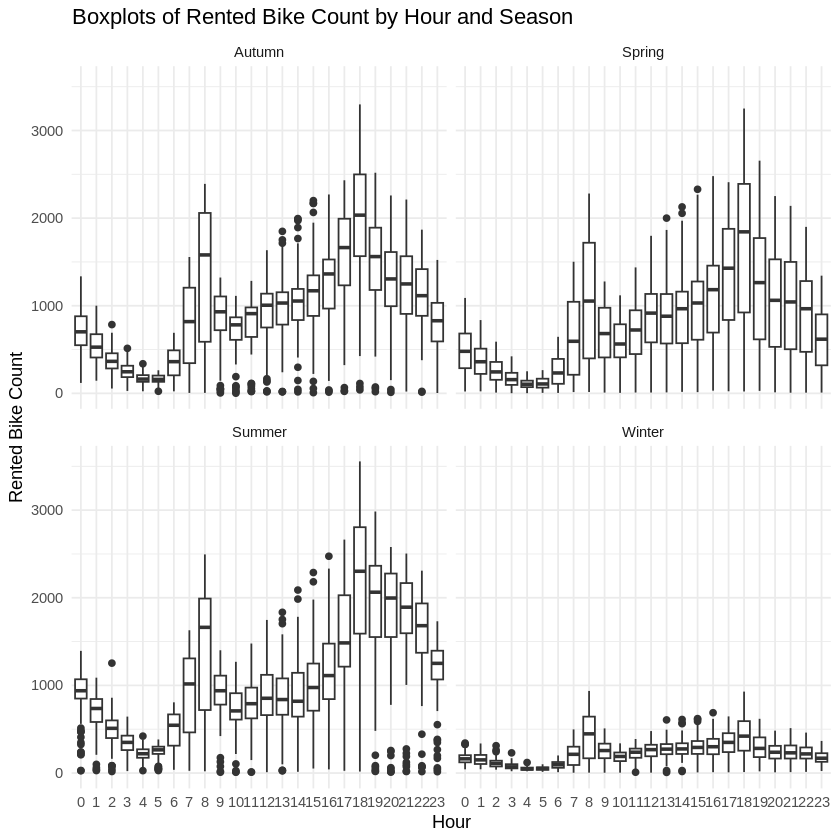

In [ ]:
# Create boxplots of RENTED_BIKE_COUNT vs. HOUR grouped by SEASONS
ggplot(seoul_bike_sharing, aes(x = factor(HOUR), y = RENTED_BIKE_COUNT)) +
  geom_boxplot() +
  facet_wrap(~ SEASONS) +
  labs(
    title = "Boxplots of Rented Bike Count by Hour and Season",
    x = "Hour",
    y = "Rented Bike Count"
  ) +
  theme_minimal()


In [ ]:
# Load necessary library
library(dplyr)

# Group data by DATE and calculate daily total rainfall and snowfall
daily_totals <- seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarize(
    total_rainfall = sum(RAINFALL),
    total_snowfall = sum(SNOWFALL)
  )

# View the summary
head(daily_totals)


DATE,total_rainfall,total_snowfall
<date>,<dbl>,<dbl>
2017-12-01,0.0,0.0
2017-12-02,0.0,0.0
2017-12-03,4.0,0.0
2017-12-04,0.1,0.0
2017-12-05,0.0,0.0
2017-12-06,1.3,8.6


In [ ]:
# Calculate the number of days with snowfall
days_with_snowfall <- sum(daily_totals$total_snowfall > 0)
days_with_snowfall


[1] 27